In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import plotly as ply
import plotly.express as px
import math as ma
import shapely.geometry as gem
import geopandas as gdp
import statsmodels as sm
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn')

In [27]:
Bixi_2021_Trips = pd.read_csv("C:/Users/ckedd/Documents/Capstone data/Bixi_trips.csv")
Bixi_2021_stations = pd.read_csv("C:/Users/ckedd/Documents/Capstone data/2021_stations.csv")
Points_of_interest = pd.read_csv("C:/Users/ckedd/Documents/Capstone data/Points_of_interest.csv")

KeyboardInterrupt: 

### Bixi Trips

| Column | Description |
|---|---|
| start_date | Date and Time of when trip started |
| emplacement_pk_start | Station code from station where the recorded trip began |
| end_date | Date and Time of when trip ended |
| emplacement_pk_end | Station code from station where the recorded trip ended |

### Bixi stations

| Column | Description |
|---|---|
| pk | Station code |
| name | Name of station |
| longitude | Longitudinal location of station |
| latitude | Latitudinal location of station |

### Points of Interest

| Column | Description |
|---|---|
| Famille | A low granularity breakdown of different types of points of interest |
| Type | A very high granularity breakdown of different types of points of interest |
| longitude | longitudinal location |
| latitude | latitudinal location |

### Population Density

| Column | Description |
|---|---|
| geom | A column of multipolygons, which make up the city of Montreal |
| densite_population_2021 | The population density of each multipolygon | 
| population_2021 | The population of each multipolygon |

In [ ]:
Points_of_interest['Famille'].value_counts()

Récréatif / sportif    1390
Service public         1041
Culturel                557
Commercial              243
Name: Famille, dtype: int64

## EDA: part 1 - Points of Interest EDA

As I primarily plan on looking at the different 'Famille' in the points of interest DataFrame (as it is fairly broad and therefore could give good results), I will separate the column into separate DataFrames, which can then be mapped. I am using the Famille column to break down the points of interest, as it will increase the granularity of the data, hopefully improving the accuracy of the models I plan to build.

In [ ]:
Poi_of_int_rec = Points_of_interest[Points_of_interest['Famille'] == 'Récréatif / sportif']
Poi_of_int_cul = Points_of_interest[Points_of_interest['Famille'] == 'Culturel']
Poi_of_int_pub = Points_of_interest[Points_of_interest['Famille'] == 'Service public']
Poi_of_int_com = Points_of_interest[Points_of_interest['Famille'] == 'Commercial']
Poi_of_int_com.dropna(inplace=True)
Poi_of_int_cul.dropna(inplace=True)
Poi_of_int_pub.dropna(inplace=True)
Poi_of_int_rec.dropna(inplace=True)

Poi_of_int_com['Famille'].value_counts()

C:\Users\ckedd\AppData\Local\Temp\ipykernel_18372\3346356164.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Poi_of_int_com.dropna(inplace=True)
C:\Users\ckedd\AppData\Local\Temp\ipykernel_18372\3346356164.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Poi_of_int_cul.dropna(inplace=True)
C:\Users\ckedd\AppData\Local\Temp\ipykernel_18372\3346356164.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Poi_of_int_pub.dropna(inplac

Commercial    243
Name: Famille, dtype: int64

To map the different locations of different points of interest, I am using the plotly subplot scattermapbox function. This generates data points on a map given the coordinate of the data. A heatmap could also work for this purpose, but wouldn't be suited for showing exact locations. From the maps, there are clear clusters near the river, just east of the park in central Montreal. This makes sense, as those areas are clearly the center of activity in Montreal, meaning  most Points of interest would be built around there.

In [ ]:

data = [
    go.Scattermapbox(dict(ids = Poi_of_int_cul, 
                        lat=Poi_of_int_cul["latitude"], 
                        lon=Poi_of_int_cul["longitude"], 
                        hoverinfo="skip",
                        fillcolor='seagreen',
                        name = 'Cultural',
                        subplot= 'mapbox'
    )),
    go.Scattermapbox(dict(ids = Poi_of_int_com, 
                        lat=Poi_of_int_com["latitude"], 
                        lon=Poi_of_int_com["longitude"], 
                        fillcolor='turquoise',
                        name = 'Commercial',
                        subplot='mapbox2'
    )),
    go.Scattermapbox(dict(ids = Poi_of_int_rec, 
                        lat=Poi_of_int_rec["latitude"], 
                        lon=Poi_of_int_rec["longitude"], 
                        fillcolor='steelblue',
                        name = 'Recreatial',
                        subplot= 'mapbox3'
    )),
    go.Scattermapbox(dict(ids = Poi_of_int_pub, 
                        lat=Poi_of_int_pub["latitude"], 
                        lon=Poi_of_int_pub["longitude"], 
                        fillcolor='tomato',
                        name = 'Public',
                        subplot= 'mapbox4'
))
]
layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        style = 'open-street-map',
       domain={'x': [0, 0.5], 'y': [0, 0.5]},
        bearing=0,
        center=dict(
            lat=45.52424415885807,
            lon=-73.60550692731958

        ),
        pitch=0,
        zoom=10
    ),
    mapbox2=dict(
       domain={'x': [0, 0.5], 'y': [0.5, 1]},
        style = 'open-street-map',
        bearing=0,
        center=dict(
            lat=45.52424415885807,
            lon=-73.60550692731958

        ),
        pitch=0,
        zoom=10
    ),
    mapbox3=dict(
       domain={'x': [0.5, 1], 'y': [0, 0.5]},
        style = 'open-street-map',
        bearing=0,
        center=dict(
            lat=45.52424415885807,
            lon=-73.60550692731958

        ),
        pitch=0,
        zoom=10
    ),
    mapbox4=dict(
       domain={'x': [0.5, 1], 'y': [0.5, 1]},
        style = 'open-street-map',
        bearing=0,
        center=dict(
            lat=45.52424415885807,
            lon=-73.60550692731958

        ),
        pitch=0,
        zoom=10
    ),
)

fig = go.FigureWidget(data=data, layout=layout)
fig.update_layout(height = 1000,
width = 1000,
title = 'Point of Interest Locations')
fig.show()

The Commercial points of interest, are the most focused of any sub-set, being based around the River front, just East of the Mont-Royal hill/park. The high focus of the points could have mixed results, depending on how the number of trips at Bixi stations in the area map together with these Commercial points of interest. If the most popular stations are in a similar location to the cluster of the Commercial points of interest, then Poi_of_int_com will be a major determinent for my future models. However, if the popular staions are not fully aligned, the impact of Poi_of_int_com will be limited in the modelling.

The Cultural points of interest are also relatively densely clustered around same area of Montreal as the Commercial points of interest. Cultural points of interest cover a wide range of map features, ranging from Museums to individual "public art", which can be a statue in a park. Due this variety, Poi_of_int_cul is spread over a larger area than Poi_of_int_com, because of this there is a high chance that Cultural points of interst will be significant to the popularity of stations, as there is a higher chance that fairly popular stations will be near Cultural points of interest, whereas far fewer stations are likely to be close to Commercial points of interest meaning it may become a more important feature in the model.

The Public and Recreational points of interest are unlikely to have a majore impact on the number of trips, as both are extremely spread out. The Public points are somewhat dense, but I think that the diffusion of the points, will result in a wide variety of stations having pubic points of interest, rather than stations in a specific popular area, which would be were Bixi stations are more used. Recreational is even more decentralized, meaning there are very few trends that can be drawn from them. An important feature in a model, can identify a difference between two models, so if a variable is spread out across a large number of stations, the ability for that variable to be used to distinguish different points is limited, especially if the there is a limited trend between the stations with Recreational or Public points of interest within a certain range of each other

Overall, from these maps, I think there will be a trend, but not necessarily a strong one, especially as the concentration of stations is not fully aligned with the areas with the highest concentrations of points of interest. One final interesting point is that the area with the highest number of points of interest, is surround the central station (gare centale). This should mean that the Bixi stations near the most points of interest, should a higher number of trips, as the largest stations is in the same area.

### Bixi Station

As this is the most appropriate place, I will also show a map of the locations of each station. This map shows that the station locations, seem to focus on the same areas as the points of interest, which matches my hypothesis. However, the stations are slightly more spread out in the center, and decrease in number at a faster rate as you move away from then center, than the Recreational points of interest for example.

In [ ]:
data = [
    go.Scattermapbox(dict(ids = Poi_of_int_cul, 
                        lat=Bixi_2021_stations["latitude"], 
                        lon=Bixi_2021_stations["longitude"], 
                        hoverinfo="skip",
                        name = 'Stations',
                        subplot= 'mapbox'))]
layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        style = 'open-street-map',
       domain={'x': [1,1], 'y': [1,1]},
        bearing=0,
        center=dict(
            lat=45.52424415885807,
            lon=-73.60550692731958

        ),
        pitch=0,
        zoom=10))
fig = go.FigureWidget(data=data, layout=layout)
fig.update_layout(height = 1000,
width = 1000,
title = 'Station Locations')
fig.show()

A potential issue from my data is that the areas most densely covered by stations is spread across an area which isn't aligned with the Points of interest, as there is a large cluster to the North of the Mont Royal rather than focussing exclusively to the East of Mont Royal like the points of interest. As they are not aligned, the impact that Points of interest may have on future models will be severely limited. The stations just north of Mont Royal park, appear to be in a grid system matching the road layout. This layout means the distribution should be ratively uniform, with some outlier stations with several neighbours.

## EDA part 2: Number of trips to each station

This part of the EDA will focus on creating and analysing a feature for the Bixi stations column, that defines the number of trips to and the number of trips from each station. These columns will be used as the target variable in the modelling stage of this capstone. To add these columns, I will use the Bixi trips "emplacement_pk" columns, which have the start station code and the end station code. By using the value counts, I can create a column for the number of trips to a certain station code, and a number the number of trips from a station code.

In [ ]:
# station code is used to fit the Bixi trips data to Bixi station data
Bixi_2021_stations.set_index('pk', inplace=True)

In [ ]:
# Creating the new columns, by using the value counts, the number of trips will be grouped by station code
Bixi_2021_stations['number of trips from'] = Bixi_2021_Trips['emplacement_pk_start'].value_counts()
Bixi_2021_stations['number of trips to'] = Bixi_2021_Trips['emplacement_pk_end'].value_counts()

In [ ]:
Bixi_2021_stations.head()

name   latitude  longitude  \
pk                                                                      
10  Métro Angrignon (Lamont /  des Trinitaires)  45.446910 -73.603630   
13       Métro de l'Église (Ross / de l'Église)  45.462726 -73.565959   
17                            Tolhurst / Fleury  45.544149 -73.667520   
21                     St-Christophe / Cherrier  45.520290 -73.568119   
31                        Lespérance / de Rouen  45.538839 -73.552779   

    number of trips from  number of trips to  
pk                                            
10                4478.0                4843  
13                8087.0                8950  
17                2629.0                2869  
21                5696.0                3656  
31                3440.0                4116

In [ ]:

Bixi_2021_stations.reset_index(inplace=True)

To analyse the number of trips from and the number of trips to, I will use two histograms. These histograms will show whether the data is skewed or normally distributed. The hypothesis for the histograms will be skewed towards smaller numbers, as most stations will likely only have a few users, as users are spread out over the network.

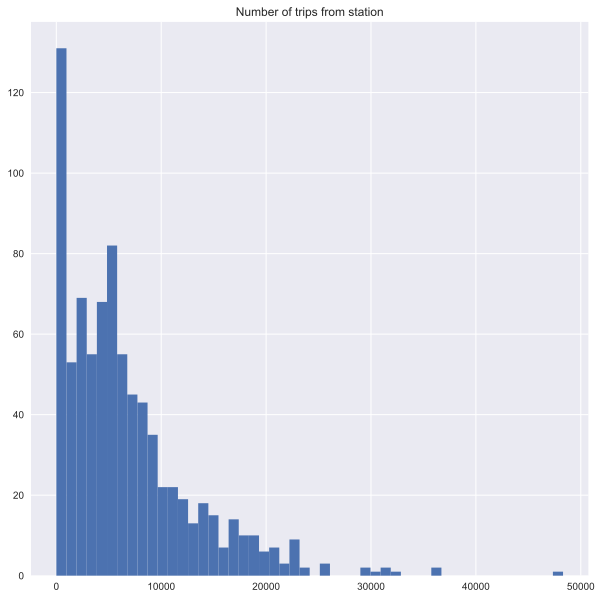

In [ ]:
# Now that the columns have been added, I can use a histogram to graph them
plt.figure(figsize = (10, 10))
plt.hist(x = Bixi_2021_stations['number of trips from'], bins=50)
plt.title('Number of trips from station')
plt.show()

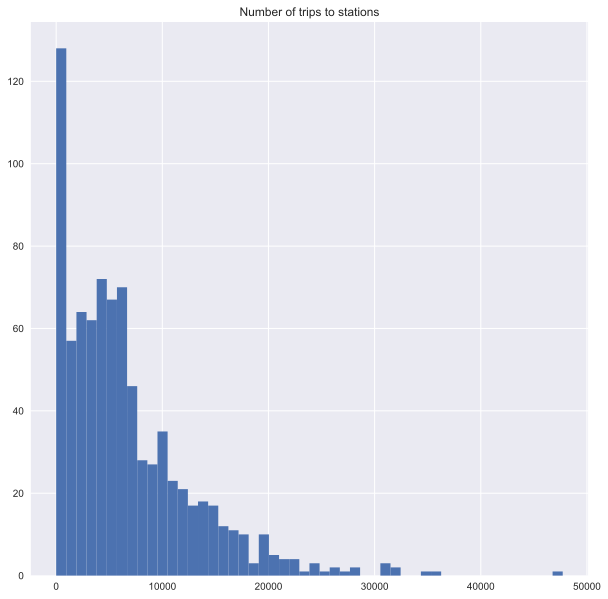

In [ ]:
# Graphing the second trips column
plt.figure(figsize = (10, 10))
plt.hist(x = Bixi_2021_stations['number of trips to'], bins=50)
plt.title('Number of trips to stations')
plt.show()

My hypothesis appears to be correct, as the distribution of number of trips to and number of trips from appears to be expoential. One problem the histrograms highlight, is the there are outliers in the data that appear to be much higher than expected, for instance there is one data point with over 40000 trips to and from, models in the future, will likely under-predict this station, as it is an outlier. At the same time, these outliers, could potentially pull the model predictions overall too high, which would reduce the accuracy of future models.

### Summary of EDA Part 1 and 2

The first two parts of this EDA, show that the central area for Points of Interest (especially commercial), are positions around the Central Station, just to the East of Mont Royal. This is similar to highest density of Bixi stations, however, the stations are also spread to the North of Mont Royal, which could limit the importance of the points of interest, espically as dense concentrations of stations could reduce the number of trips each individual station is used for.

## Data Manipulation - Part 3 - Proximity Calculations

### Calculating the number of points of interest around stations

This is important, as it answers one of the key questions for determining the popularity of a station: What is surrounding the station?. My hypothesis is that the different Familles of the points of interest will have different levels of impact on the popularity of the station. However, they will all be positively correlated with the popularity of the station.

In [ ]:
display(Bixi_2021_stations.iloc[[0]]) # Confirming the state of the index

pk                                         name  latitude  longitude  \
0  10  Métro Angrignon (Lamont /  des Trinitaires)  45.44691  -73.60363   

   number of trips from  number of trips to  
0                4478.0                4843

Before I can test the proximity of different points of interest, I need to create DataFrames of each Famille, as doing this will allow for each to be tested. In addition, their indexes need to be reset. I need to also use slices of the DataFrame, rather than filtering the DataFrame, as I want to generate an overall point of interest proximity column, incase the granularity is too fine with the different Famille.

In [ ]:
# Dividing the data into "Families", to improve the performance for each for loop
p_of_ints = Points_of_interest.copy()

poi_rec = p_of_ints[p_of_ints['Famille'] == 'Récréatif / sportif']
poi_cul = p_of_ints[p_of_ints['Famille']== 'Culturel']
poi_com = p_of_ints[p_of_ints['Famille'] == 'Commercial']
poi_pub = p_of_ints[p_of_ints['Famille'] == 'Service public']

poi_rec = poi_rec.reset_index()
poi_cul = poi_cul.reset_index()
poi_com = poi_com.reset_index()
poi_pub = poi_pub.reset_index()



To find an accurate distances for the two sets of calculations I am running (distance from city center and p), I am using the haversine formula. This formula, is designed to find the radius distance from point to another. Due the earth being a sphere, a simple euclidean distance calculation won't work, as lines of longitude combine in northen regions such as Canada. Haversine distance, compensates for this, and is accurate to around 1%, due to the earth not being a perfect sphere, leading to variation in the earths radius, which the conversion to km is reliant on.

$$

$$

The below function is based off of a javascript code block to calculate Haversine distance the website also explains a lot of the details so I have included a link [http://www.movable-type.co.uk/scripts/latlong.html]

In [ ]:
def distance(center_point, station):
    '''
    Description: This is the Haversine formula for calculating distance in Kilometers.
    ----------------------------------------------------------------------------------

    Variables: 
            center_point : a set of latitude and longitude data (it can be a single set of coordinates or two Series)
            station : the second point to determin the difference between (it can be a single set of coordinates or two Series)
    ------------------------------------------------------------------------------------
    Output: A distance value (d), that can either be used in an equation, or can be assigned to a variable.
    ------------------------------------------------------------------------------------
    Example: [45.500000, -73.300000],[45.630001,-73.519997]

            Distance = 22.41 km
    '''
    latitude1, longitude1 = center_point
    latitude2, longitude2 = station
    radius = 6371 # rough radius of the earth in kilometers - can vary slightly

    #dlat and dlon are the distances between the two points in radians
    dlat = ma.radians(latitude2-latitude1)
    dlon = ma.radians(longitude2-longitude1)

    # a adjusts the radian distance to account for curviture
    a = ma.sin(dlat/2) * ma.sin(dlat/2) + ma.cos(ma.radians(latitude1)) \
        * ma.cos(ma.radians(latitude2)) * ma.sin(dlon/2) * ma.sin(dlon/2)

    # c calculates the angular distance in radians - which can then be converted to km
    c = 2 * ma.atan2(ma.sqrt(a), ma.sqrt(1-a))
    
    # d converts the radians distance into kilometers
    d = radius * c

    return d

To find the number of Points of interest around each station, given that I want to test each Famille of Points of interest, I need to write a function to run this process for me. For this function I need to cycle through the Bixi Station DataFrame and test each point of interest against each individual station.

For this purpose, a for loop with an index and iloc is the safest way. However, it is exceptionally slow. This means that this method would scale horribly, but this is not a major issue for my purposes as I am using a DataFrame will under 1000 rows (which is relatively small).

By using a "if" statement, I can test if the distance between a station location and a points of interest location is within a set range. If it is within the set range, I will record the necessary information in a list, which will can be returned into a DataFrame which can then be merged into the main DataFrame.

In [ ]:
def proximity_count_sta(df1, df2, dist, column_name):
    '''
    Description: This function uses decimal longitude and latitude, to calculate the how many locations in df2 are with a set distance of df1
    This function also places this data into a column named within the function, which will contain the value_counts of proximities

    Variables:
    df1 : The dataframe containing locations you want to proximities around
    df2 : The dataframe loop tested against df1
    dist : The haversine distance around each df1 point you want to count as close enough to record
    column_name : The name of the column you want to add

    Output: Returns a value_count of the number of df2 locations are within a set distance of df1, a variable is needed to save the value_count.
    
    Example:
    station_count = proxmity_count_sta(bix_sta_prox[bix_sta_prox['pk'] == 10], poi_com, 10, 'number of points of interest around staition')

    station_count.value_counts() = 1 (within 10 km of the Bixi station)
    '''
    poi_prox = pd.DataFrame([])
    dis_df_id = []
    dis_sta_df = []
    # Setting up the for loops - indexes are used so that .iloc can extract any data needed
    for i in df1.index:
        for d in df2.index:

            # This if statement, calulates if the Longitude or latitude of the station, is within a specified sized grid square around the point of interest
            if (distance([df2['latitude'].iloc[d], df2['longitude'].iloc[d]], [df1['latitude'].iloc[i], df1['longitude'].iloc[i]]) <= dist):
                # By have a variable produced, based on the index, I can append each change to a list.
                sta_code = df1.index[i]
                dis_sta_df.append(sta_code)
            d += 1
        
        i += 1

    # With a series of lists for each value I want, I can compile all the data into a single DataFrame.
    poi_prox[f'{column_name}'] = dis_sta_df

    # # The below code changes depending on the output I want to test
    station_prox_ = poi_prox[f'{column_name}'].value_counts()
    return station_prox_
    

In [29]:
# Creating a copy of the DataFrame for feature creation purposes
bix_sta_prox = Bixi_2021_stations.copy()
bix_sta_prox.head()

pk                                         name   latitude  longitude  \
0  10  Métro Angrignon (Lamont /  des Trinitaires)  45.446910 -73.603630   
1  13       Métro de l'Église (Ross / de l'Église)  45.462726 -73.565959   
2  17                            Tolhurst / Fleury  45.544149 -73.667520   
3  21                     St-Christophe / Cherrier  45.520290 -73.568119   
4  31                        Lespérance / de Rouen  45.538839 -73.552779   

   number of trips from  number of trips to  
0                4478.0                4843  
1                8087.0                8950  
2                2629.0                2869  
3                5696.0                3656  
4                3440.0                4116

Some of the Stations have had their locations recorded several times, but under different station codes. To resolve this I will separate all the rows with duplicate locations, then combine them together based on the location. By slicing latiude values with keep=False, all Stations with the same latitude will be separated. I have to combine rather than drop rows, because the number of trips have been assigned to each station, and as the station codes are different at the duplicate stations, I would have lost data if I had combined the rows earlier. So I have to run a code block that can add the trip count columns into one row for each station, then drop the rows that were duplicated.

In [ ]:
dup_locations = bix_sta_prox[bix_sta_prox['latitude'].duplicated(keep=False)].sort_values('latitude')

dup_locations_backup = dup_locations.copy()

As there are up to 3 latitudes in a row that are similar, I will use a triple layered if statement to combine the trips columns. This way,no data will be lost, whilst allowing me to drop unnecessary rows and improve the accuracy of the stations represented, as the trips count for each station will be combined into one station rather than spread between the mislabelled versions of the station. 

In [ ]:
# Using setting dup_locations as a new dataframe with reset_index so that the if statements will work
# I did not drop the index column this data would produce with an inplace=True, as the old index column will allow for reintegration of the data later.
dup_locations = dup_locations.reset_index()
dup_locations = dup_locations.fillna(0)
for i in dup_locations.index:
        # "and" is used in the if statement to make certain the stations have BOTH the same latitude AND longitude, rather than simply being in paraelle with another station. The second and statement is to prevent stations that have 3 in a row from being combined early
    if (dup_locations['latitude'].iloc[i] == dup_locations['latitude'].iloc[i+1]) and (dup_locations['longitude'].iloc[i] == dup_locations['longitude'].iloc[i+1]) and (dup_locations['latitude'].iloc[i+1] != dup_locations['latitude'].iloc[i+2]):
            dup_locations['number of trips to'].iloc[i] = dup_locations['number of trips to'].iloc[i] + dup_locations['number of trips to'].iloc[i+1]
            dup_locations['number of trips from'].iloc[i] = dup_locations['number of trips from'].iloc[i] + dup_locations['number of trips from'].iloc[i+1]
            # +=2 is used to fully skip the pair once they have been counted, this should prevent multiple stations from being counted
            i+=2
    elif (dup_locations['latitude'].iloc[i] == dup_locations['latitude'].iloc[i+2]) and (dup_locations['longitude'].iloc[i] == dup_locations['longitude'].iloc[i+2]):
            dup_locations['number of trips to'].iloc[i] = dup_locations['number of trips to'].iloc[i] + dup_locations['number of trips to'].iloc[i+1] + dup_locations['number of trips to'].iloc[i+2]
            dup_locations['number of trips from'].iloc[i] = dup_locations['number of trips from'].iloc[i] + dup_locations['number of trips from'].iloc[i+1] + dup_locations['number of trips from'].iloc[i+2]
            i+=3
    elif i== 58 and (dup_locations['latitude'].iloc[i+1] == dup_locations['latitude'].iloc[i+2]) and (dup_locations['longitude'].iloc[i+1] == dup_locations['longitude'].iloc[i+2]):
            dup_locations['number of trips to'].iloc[i+1] = dup_locations['number of trips to'].iloc[i+2] + dup_locations['number of trips to'].iloc[i+1]
            dup_locations['number of trips from'].iloc[i+1] = dup_locations['number of trips from'].iloc[i+2] + dup_locations['number of trips from'].iloc[i+1]
            # Using a break, as this code would throw an error if an if statement has to check rows that don't exist.
            # As I am using the index, the if statments have to stop three rows before the end
            # As the last two rows are duplicates, the last elif statement is required specifically for this issue. To reuse the code the last elif statement would need re-writing.
            break
    i+=1


# Dropping the stations with the same latitude, whilst keeping the first duplicated row
drop_locations =dup_locations[dup_locations['latitude'].duplicated()]
dup_locations.drop(index=drop_locations.index, inplace=True)
dup_locations[dup_locations['latitude'].duplicated()]

# Using the backup dup_locations to remove duplicate rows, and using the dup_locations to replace the necessary rows in the main DataFrame.
dup_locations = dup_locations.set_index('index')
dup_locations_backup.drop(index=dup_locations.index, inplace=True)
dup_locations_backup = dup_locations_backup.sort_index()
bix_sta_prox.iloc[dup_locations.index] = dup_locations
bix_sta_prox.drop(index = dup_locations_backup.index, axis=0, inplace=True)
# Testing to make sure that the code has been successful
bix_sta_prox[bix_sta_prox['latitude'].duplicated()]

C:\Users\ckedd\AppData\Local\Temp\ipykernel_22260\110625495.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ckedd\AppData\Local\Temp\ipykernel_22260\110625495.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ckedd\AppData\Local\Temp\ipykernel_22260\110625495.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ckedd\AppData\Local\Temp\ipykernel_22260\110625495.py:14: SettingWithCopyWarning:


A value i

Empty DataFrame
Columns: [pk, name, latitude, longitude, number of trips from, number of trips to]
Index: []

In [ ]:

bix_sta_prox.reset_index(inplace=True)
bix_sta_prox.drop('index', axis=1, inplace=True)

Some of coordinate data for Bixi stations are set to a "default" value of -1.0 latitude and -1.0 longitude. This could have a serious impact on proximity and distance calculations, so needs to be fixed. Most of these values are likely due to the duplicate station issues solved above, so there aren't many rows with this issue. However, I will still run a value count, to test the number.

In [ ]:
bix_sta_prox[bix_sta_prox['longitude'] == -1.0].value_counts()

pk   name          latitude  longitude  number of trips from  number of trips to
856  Smith / Peel  -1.0      -1.0       9749.0                10054                 1
dtype: int64

There is one station with "default" coordinates, so I can manually fix this issue. As I know the pk/station code, as well as the name of the station. I can find the postcode on google, based on the name of station, then I can use google again to find the coordinates. Then I can set the coordinates, but using the station code to isolate the latitude and longitude for the "Smith / Peel" station, which I can then replace with the new google coordinates.

In [ ]:
bix_sta_prox['latitude'][bix_sta_prox['pk'] == 856] = 45.4916
bix_sta_prox['longitude'][bix_sta_prox['pk'] == 856] = -73.5565
bix_sta_prox[bix_sta_prox['pk'] == 856]

C:\Users\ckedd\AppData\Local\Temp\ipykernel_22260\492674849.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ckedd\AppData\Local\Temp\ipykernel_22260\492674849.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



pk          name  latitude  longitude  number of trips from  \
569  856  Smith / Peel   45.4916   -73.5565                9749.0   

     number of trips to  
569               10054

As the location columns in bix_sta_prox are now usable, without duplcated or "default" values, I can generate proximity data for the number of points of interest around each station. The proximity_count_sta function, uses haversine distance to generate a circle of a specified distance, which it uses to count points of interest. I chose to use 500m for these calculations, as 500m is close enough for a location to be within a theoretical "walking distance", whilst being a large enough area to allow stations outside of the center of the city to still be measured, as otherwise only central stations have close points of interest, reducing the effectiveness of the data.

In [ ]:
# Generating Proximity data, using the Prox_count_sta function I defined earlier
# In the proximity_count_sta function, 1 = 1km and 0.5 = 500m.
Commerical_prox_500m = proximity_count_sta(bix_sta_prox, poi_com, 0.5, 'Commercial prox count')
Cultural_prox_500m = proximity_count_sta(bix_sta_prox, poi_cul, 0.5, 'Cultural prox count')
Rec_prox_500m = proximity_count_sta(bix_sta_prox, poi_rec, 0.5, 'Rec prox count')
Public_prox_500m= proximity_count_sta(bix_sta_prox, poi_pub, 0.5, 'public prox count')
POI_prox_500m = proximity_count_sta(bix_sta_prox, p_of_ints, 0.5, 'points of interest prox count')

With all of the proxmity data created, I can now use pd.merge to combine the columns into the main (bix_sta_prox) DataFrame. But saving the station number in a list, I can use it as the merging column. This means that each station will be given a number of proximity points of interest based on station number.

It was important that I fixed the duplicate latitude and longitude first, as otherwise I could accidently combine the proximity counts, which would result in multiplications of the actual number of close points of interest.

In [ ]:
# Merging the new columns into the main DataFrame - merged based on the station code (pk) number.
bix_sta_prox = pd.merge(Commerical_prox_500m, bix_sta_prox, right_on= 'pk', left_index = True, how='right')
bix_sta_prox = pd.merge(Cultural_prox_500m, bix_sta_prox, right_on= 'pk', left_index = True, how='right')
bix_sta_prox = pd.merge(Public_prox_500m, bix_sta_prox, right_on= 'pk', left_index = True, how='right')
bix_sta_prox = pd.merge(Rec_prox_500m, bix_sta_prox, right_on= 'pk', left_index = True, how='right')
bix_sta_prox = pd.merge(POI_prox_500m, bix_sta_prox, right_on= 'pk', left_index = True, how='right')
# Sanity checking the code
bix_sta_prox.head(3)


points of interest prox count  Rec prox count  public prox count  \
0                           14.0             6.0                6.0   
1                            7.0             3.0                4.0   
2                           13.0            11.0                1.0   

   Cultural prox count  Commercial prox count  pk  \
0                  2.0                    NaN  10   
1                  NaN                    NaN  13   
2                  NaN                    1.0  17   

                                          name   latitude  longitude  \
0  Métro Angrignon (Lamont /  des Trinitaires)  45.446910 -73.603630   
1       Métro de l'Église (Ross / de l'Église)  45.462726 -73.565959   
2                            Tolhurst / Fleury  45.544149 -73.667520   

   number of trips from  number of trips to  
0                4478.0                4843  
1                8087.0                8950  
2                2629.0                2869

When there are no points of interest around a station, it returns a Null value. To fix this I can simply use fillna(0), to replace the Null values with the actual number of points of interest, which is 0.

In [ ]:
# The merged code generates Null values whenever there are no Points of interest near the stations. As all the Null values are generated by this, I can safely replace all null values with zero.
bix_sta_prox['points of interest prox count'] = bix_sta_prox['points of interest prox count'].fillna(0)
bix_sta_prox['Rec prox count'] = bix_sta_prox['Rec prox count'].fillna(0)
bix_sta_prox['public prox count'] = bix_sta_prox['public prox count'].fillna(0)
bix_sta_prox['Commercial prox count'] = bix_sta_prox['Commercial prox count'].fillna(0)
bix_sta_prox['Cultural prox count'] = bix_sta_prox['Cultural prox count'].fillna(0)

With the proximity columns generated and cleaned, I can now run statistical tests to see if the new columns are statistically relavent. To do this, I will run Pearsonr tests, as the p-value they generate shows statistical relevance, and the statistic, is an indicator of how much the metric impact the number of trips.

In [ ]:
#Using pearsonr to test if points of interest have correlation with station usage, and to help quantify that correlation.
print(stats.pearsonr(bix_sta_prox['points of interest prox count'], bix_sta_prox['number of trips to']))
print(stats.pearsonr(bix_sta_prox['Rec prox count'], bix_sta_prox['number of trips to']))
print(stats.pearsonr(bix_sta_prox['public prox count'], bix_sta_prox['number of trips to']))
print(stats.pearsonr(bix_sta_prox['Cultural prox count'], bix_sta_prox['number of trips to']))
print(stats.pearsonr(bix_sta_prox['Commercial prox count'], bix_sta_prox['number of trips to']))

PearsonRResult(statistic=0.19007341668030647, pvalue=6.410997760545774e-08)
PearsonRResult(statistic=0.19407109629959785, pvalue=3.3354502150066945e-08)
PearsonRResult(statistic=0.18047625378996934, pvalue=2.909179556434259e-07)
PearsonRResult(statistic=0.16093511903084318, pvalue=4.9699151052903295e-06)
PearsonRResult(statistic=0.10247854338076721, pvalue=0.0037773765171966516)


The extremely low P-values confirms the relationship between points of interest and the number of trips to each station. The Pearson stat, shows that around 30% of the variance in trips to stations is shown by Points of interest proximity. To visualise this correlation, as well as assess any multicollinearity within the columns, I will create a heatmap.

This heatmap, shows that each type of point of interest has an impact on the number of trips. The only concern with this data is the extremely high multicollinerarity between public prox count, and both cultural and commerical prox count, although this is to be expected, as public services, such as train stations tend to be located next to other points of interest. Commerical points of interest also have high multicollinearity, which is likely due to the Commercial points of interest being focused into a small area of Montreal, where the density of other points of interest also increase. This means that the Commerical points of interest provide very little new information on the number of trips to.

<AxesSubplot:>

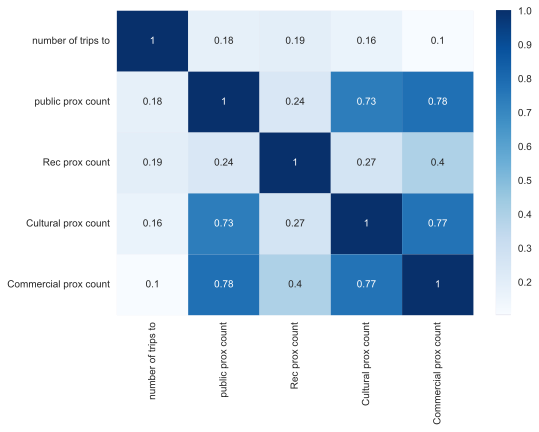

In [ ]:
bix_sta_heatmap = bix_sta_prox[['number of trips to', 'public prox count', 'Rec prox count', 'Cultural prox count', 'Commercial prox count']]
# The default statisical test for the heatmap is pearsonr, this allows each proximity count to be compared 
sns.heatmap(bix_sta_heatmap.corr(), cmap = 'Blues', annot = True)

To display any linear relationship between number of trips and the number of points of interest, I have created a scatter plot, with a OLS line of best fit. The steepness of the OLS line will show how strong the linear correlation is.

In [ ]:
px.scatter(
    data_frame=bix_sta_prox,
    x = 'number of trips to',
    y = 'points of interest prox count',
    #hover_data= 'Com station prox count',
    hover_name= 'name',
    trendline= 'ols',
    trendline_color_override= 'red',
    title= 'Linear correlation between points of interest and number of trips to',
    labels = {'number of trips to': 'Count of trips to',
              'points of interest prox count': 'Count of points of interst'})

The graph above shows that that there isn't a strong linear correlation between number of Points of interest, and the number of trips to a station. The pearsonr tests, showed that a correlation does exist, which means the issue is likely due to the structure of the points of interest data. If the data has an expoential rather than normal distribution, the correlation could be high, whilst not being linear.

### Mapping Points of Interest and Bixi Stations

Finally, I want to look at how the station and point of interest data overlap within Montreal. To do this in a geographical format, I will use plotly express to generate a geographical heatmap of the city, with the color dictated by the "points of interest prox count". This map shows the density of points of interest, in relation to stations. This means the hotspot shown in the map has a high number of points of interest, AND a high number of stations, which is why it is in a similar location to the other stations.

In [ ]:
px.density_mapbox(data_frame=bix_sta_prox,
 radius=10,
 lat=bix_sta_prox['latitude'],
 lon=bix_sta_prox['longitude'],
 # z axis impacts the color of the map
 z=bix_sta_prox['points of interest prox count'], color_continuous_scale= 'viridis',
 # I have used the average location of bixi stations, to help center the map
 center=dict(lat = bix_sta_prox['latitude'].mean(), lon = bix_sta_prox['longitude'].mean()),
 zoom=10,
 opacity= 0.7,
 mapbox_style="stamen-terrain")

The location with the brightest hotspot seems to be the "center of ativity" in Montreal. The location is also where a large number of stations are based. The areas with the highest density of points of interest (according to my earlier graph), is actually slightly East of the hotspot. One reason for this could be the 500m area for points of interest, which would allow for the hotspot to be slightly further from the most points of interest. A second reason is that the map is also affected by the number o stations. As more stations are found around the hotspot, there is a clear trade off between the highest density of Points of Interests and highest density of stations. Wherever these two concepts intercept, is where the brightest part of the heatmap is placed.

### Looking at How proximity to the City center impacts Bixi usage

I want to calculate how the bixi useage changes as you head towards the center of Montreal. There are two ways to determine the "center" in the context of bixi bikes in Montreal. If you look up the coordinates of Montreal, you get what should be the center, but in reality is a location to the North of the Island, far away from most bixi stations. This makes the coordinates unusable for this calculation as the center of activity is in a different area of city, meaning no trends can be formed.

To compensate for this, I can generate a second set of proximity center, from the mean latitude and longitude values of the bixi stations, assuming that the centeral point of the stations is also the center of activity within the city. I can then compare the two calculations from the center, and if both, one of or neither of the distance to center calculations can be used to find usage trends for bixi.

My hypothesis from this data is that there will be a decrease in the number of Bixi trips, as you move further from the city of Montreal. I think this because bike favor densely built areas, due to shorter travel distances, as well as the center of Montreal being likely to contain most of the place people want to cycle to.

In [ ]:
# Using a for loop to generate distances from center, into a DataFrame that can be intergrated into the main DataFrame
distance_c_df = pd.DataFrame([])
distance_from_center = []
for i in bix_sta_prox.index:
    distance_from_center.append(distance([bix_sta_prox['latitude'].iloc[i], bix_sta_prox['longitude'].iloc[i]],[45.630001,-73.519997]))
    i+=1
distance_c_df['Distance from center'] = distance_from_center
distance_c_df.head(3)

Distance from center
0             21.375417
1             18.941373
2             14.930417

In [ ]:
# Using a concat to to add the data to the main DataFrame (converting the df to station_center isn't necessary, but is a legacy of the original codeblock I built for concatting, which I copied here).
# As the first code line doesn't impact run time, I have kept the code as it is, to avoid any unforeseen integration errors.
station_center = distance_c_df
bix_sta_prox = pd.concat([station_center, bix_sta_prox], axis=1)
display(bix_sta_prox.head(2))

Distance from center  points of interest prox count  Rec prox count  \
0             21.375417                           14.0             6.0   
1             18.941373                            7.0             3.0   

   public prox count  Cultural prox count  Commercial prox count  pk  \
0                6.0                  2.0                    0.0  10   
1                4.0                  0.0                    0.0  13   

                                          name   latitude  longitude  \
0  Métro Angrignon (Lamont /  des Trinitaires)  45.446910 -73.603630   
1       Métro de l'Église (Ross / de l'Église)  45.462726 -73.565959   

   number of trips from  number of trips to  
0                4478.0                4843  
1                8087.0                8950

In [ ]:
# Generating a scatter plot to see if there is linear correlation
px.scatter(
    data_frame=bix_sta_prox,
    x = 'number of trips to',
    y = 'Distance from center',
    #hover_data= 'Com station prox count',
    hover_name= 'name',
    trendline= 'ols',
    trendline_color_override= 'red',
    title= 'Bixi useage from "center" of Montreal',
    labels = {'number of trips to': 'Count',
              'Distance from center': 'Distance in km'})

The above scatter plot shows that there is no real linear correlation between the distance from the center and the number of trips. This is due to the coordinate Google uses for Montreal placing the center to the North of the main island, whilst the Bixi stations are focused in the South. This means all stations are essentially on one side of the "center", and therefore distance is irrelavent. To resolve this, I will generate a new column for distance from center, with the center being the mean longitude and latitude of the Bixi stations. I view this center as the "Center of Activity", meaning the busiest part of the city.

In [ ]:
distance_df = pd.DataFrame([])
distance_from_bixi_center = []
for i in bix_sta_prox.index:
    distance_from_bixi_center.append(distance([bix_sta_prox['latitude'].iloc[i], bix_sta_prox['longitude'].iloc[i]],[bix_sta_prox['latitude'].mean(), bix_sta_prox['longitude'].mean()]))
    i+=1
distance_df['Distance from bixi center'] = distance_from_bixi_center
distance_df.head(3)

Distance from bixi center
0                   8.193316
1                   6.712111
2                   6.429883

In [ ]:
station_center = distance_df
type(station_center)
station_center
bix_sta_prox = pd.concat([station_center, bix_sta_prox], axis=1)
display(bix_sta_prox.head(2))

Distance from bixi center  Distance from center  \
0                   8.193316             21.375417   
1                   6.712111             18.941373   

   points of interest prox count  Rec prox count  public prox count  \
0                           14.0             6.0                6.0   
1                            7.0             3.0                4.0   

   Cultural prox count  Commercial prox count  pk  \
0                  2.0                    0.0  10   
1                  0.0                    0.0  13   

                                          name   latitude  longitude  \
0  Métro Angrignon (Lamont /  des Trinitaires)  45.446910 -73.603630   
1       Métro de l'Église (Ross / de l'Église)  45.462726 -73.565959   

   number of trips from  number of trips to  
0                4478.0                4843  
1                8087.0                8950

In [ ]:
px.scatter(
    data_frame=bix_sta_prox,
    x = 'number of trips to',
    y = 'Distance from bixi center',
    #hover_data= 'Com station prox count',
    hover_name= 'name',
    trendline= 'ols',
    trendline_color_override= 'red',
    title= 'Bixi useage increases as you get closer to Montreal center',
    labels = {'number of trips to': 'Count',
              'Distance from bixi cener' : 'Distance from center (km)'
             }
)

The above graph showing linear correlation between the usage of stations and the "center of activity", if far more informative, supporting the idea that the further from the center of Montreal you travel, the fewer people will use Bixi bikes. As bike travel is heavily influenced by the density of an area (sparse areas can't be used for cycling as the distances become too great), areas near the center are better designed for bikes, especially since most destinations for bike travel are normally near the center of a town or city.

In [ ]:
stats.pearsonr(bix_sta_prox['Distance from bixi center'], bix_sta_prox['number of trips to'])

PearsonRResult(statistic=-0.5101105991163851, pvalue=5.1567082236911425e-54)

In [ ]:
stats.pearsonr(bix_sta_prox['Distance from center'], bix_sta_prox['number of trips to'])

PearsonRResult(statistic=-0.09427054122826409, pvalue=0.007741861662412008)

The graphs and pearsonr tests, show that the distance from the center doesn't have a major impact on station usage, when using the googled center of Montreal. If you use the center of the bixi stations ('Center of Activity'), the distance accounts for around 50% of variance, according to the pearsonr test. This makes it much more significant than proximity to points of interest.

The main issue with using bixi stations to define the center of the city, is that it causes the results to no longer be robust. If you want to plan a bike hire scheme in a new city and want to use the data, finding the center point to base the distance calculations on, means finding the center of activity, rather than simply the geographic center. This could be challenging, but also shows the need for intelligent surveying of a city before major projects such as bike hire schemes can be undertaken.

### Dense stations
Another proximity metric I want to use is the number of "close" stations (within 500m) for each station. What this means is the number of other stations within 500m of the tested station. I want to this data, as it may be important for adjusting the dense amount of stations close to the Center of Activity, as lots of nearby stations should spread out the trips, having a negative impact on station usage. However, lots of stations also means a high demand, as each bike station only contains so many bikes. As a result, the station proximity data, will likely have a postive correlation, much like the "distance to bixi center" data but inversed.

Due to my proximity function being robust, and the longitude and latitude of the bix_sta_prox DataFrame and the Points of interest DataFrame, being called the same, I can simply run the same code I did earlier, but with the Points of interest DataFrame replaced by the bix_sta_prox DataFrame.

In [ ]:
close_stations_500m = proximity_count_sta(bix_sta_prox, bix_sta_prox, 0.5,'close stations')

In [ ]:
bix_sta_prox = pd.merge(close_stations_500m, bix_sta_prox, right_on= 'pk', left_index = True, how='right')
bix_sta_prox.fillna(0, inplace=True)
bix_sta_prox.head(2)


close stations  Distance from bixi center  Distance from center  \
0             8.0                   8.193316             21.375417   
1             4.0                   6.712111             18.941373   

   points of interest prox count  Rec prox count  public prox count  \
0                           14.0             6.0                6.0   
1                            7.0             3.0                4.0   

   Cultural prox count  Commercial prox count  pk  \
0                  2.0                    0.0  10   
1                  0.0                    0.0  13   

                                          name   latitude  longitude  \
0  Métro Angrignon (Lamont /  des Trinitaires)  45.446910 -73.603630   
1       Métro de l'Église (Ross / de l'Église)  45.462726 -73.565959   

   number of trips from  number of trips to  
0                4478.0                4843  
1                8087.0                8950

To test how representative the number of close stations is, to the number of trips to, I will use a scatterplot with a OLS line of best fit to test for linear correlation.

In [ ]:
px.scatter(
    data_frame=bix_sta_prox,
    x = 'number of trips to',
    y = 'close stations',
    hover_name= 'name',
    trendline= 'ols',
    trendline_color_override= 'red',
    title= 'Does the number of stations nearby impact station usage',
    labels = {'number of trips to': 'Count',
              'close stations' : 'close stations (Count)'
             }
)

The results of the graph show that there is likely no linear correlation between the number of stations, and the number of trips to. To double check if there is any correlation at all, I will run a pearsonr test as well. The lack of correlation isn't necessarily surprising, as it means the high density of stations towards the center of Montreal is compensated for by the other factors increasing usage of stations near the center. The lack of linear correlation is not too surprising, when looking back at the map of stations, as the gridded layout of the Bixi stations means there are isn't much variation to the North of Mont Royal hill, meaning the range of trip counts found in the stations there wouldn't have a major impact on the graph. One point that this scatterplot does show is that the cluster of stations (around where the largest Montreal train station is and the Points of interest are based), aren't most popular stations, which likely means the correlation between points of interest and Bixi station usage will be minimal.

In [ ]:
stats.pearsonr(bix_sta_prox['close stations'], bix_sta_prox['number of trips to'])

PearsonRResult(statistic=0.2352284580868823, pvalue=1.756643893525987e-11)

The results of the pearsonr test, show that there is a correlation, just not a linear one. This means that the "close stations column should be kept in the bix_sta_prox DataFrame and used in my modelling.

### Metro Station proxmity

Finally, I want to generate a column of data for the number of Metro stations. There is an obvious outlier point on each graph for number of trips to. Looking at the outlier, it is a Metro staion in "Mont-Royal", so I want to adjust my model to metro stations potentially resulting in increased station usage. To do this adjustment, I am going to add a column for the number of close metro stations. The same style as with other points of interest, but specifically with the Type of point of interest being "station de metro".

Metro stations and train stations are relatively easy to map in any city they are present in. This means I can add a column on nearby metro stations without worrying about reducing robustness of the model.

In [ ]:
poi_metro = Points_of_interest[Points_of_interest['Type'] == 'Station de métro']
poi_metro.reset_index(inplace=True)

In [ ]:
Metro_prox_200m = proximity_count_sta(bix_sta_prox, poi_metro, 0.2, 'Metro prox count')


In [ ]:
bix_sta_prox = pd.merge(Metro_prox_200m, bix_sta_prox, right_on= 'pk', left_index = True, how='right')
bix_sta_prox['Metro prox count'].fillna(0, inplace = True)

In [ ]:
bix_sta_prox.head(2)

Metro prox count  close stations  Distance from bixi center  \
0               0.0             8.0                   8.193316   
1               0.0             4.0                   6.712111   

   Distance from center  points of interest prox count  Rec prox count  \
0             21.375417                           14.0             6.0   
1             18.941373                            7.0             3.0   

   public prox count  Cultural prox count  Commercial prox count  pk  \
0                6.0                  2.0                    0.0  10   
1                4.0                  0.0                    0.0  13   

                                          name   latitude  longitude  \
0  Métro Angrignon (Lamont /  des Trinitaires)  45.446910 -73.603630   
1       Métro de l'Église (Ross / de l'Église)  45.462726 -73.565959   

   number of trips from  number of trips to  
0                4478.0                4843  
1                8087.0                8950

## EDA part 4: population Density in Montreal

I want more data before modelling station usage within the Bixi network. A useful metric, that Bixi mention using when planning stations, is population density. The assumption with population density, is that when population density goes up, station useage should also increase. I was able to get a dataset on population density for Montreal, but only in a csv format. To get useful data from the file, I need to convert the csv, first to a DataFrame, then to a GeoDataFrame.

For this section, I will be placing each bixi station into a multi-polygon using shapely to convert the stations into "Point" geometry. each multi-polygon relates to a population density, so by placing each station within a polygon, I can gain information of the population density of the areas surrounding the station.



In [ ]:
pop_dense = pd.read_csv('C:/Users/ckedd/Documents/Capstone data/pop_dense.csv')

In [ ]:
pop_dense.shape

(3235, 4)

As I am  using two columns from the pop_dense DataFrame, one which contains the population density and one which contains the multi-polygon data, needed to align stations with the appropriate population density. I only need to check that there are no Duplicates and no null values within the densite_population_2021 colum  and the geom column. Once they have been cleaned, I can use the data in a GeoDataFrame and graph population density.

In [ ]:
pop_dense = pop_dense[['densite_population_2021', 'geom']]

In [ ]:
# zipping the longitude and latitude together in list then adding to a column in my dataframe
bix_sta_prox['coords'] = list(zip(bix_sta_prox['longitude'], bix_sta_prox['latitude']))
#converting the coordinates in to Geometric Points
bix_sta_prox['coords'] = bix_sta_prox['coords'].apply(gem.Point)

In [ ]:
#Creating a geodataframe to calculate which population density polygons each station is in
stations_dense = gdp.GeoDataFrame(bix_sta_prox['coords'], geometry='coords', crs = "EPSG:4326")

In [ ]:
stations_dense.info() # checking the GeoDataFrame, to make sure Dtype is Geometry

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   coords  797 non-null    geometry
dtypes: geometry(1)
memory usage: 6.4 KB


Now that the coordinates of the stations are now geometric points, I have to transform the pop_dense DataFrame (from anagraph.io), into a GeoDataFrame, so that I can use a sjoin to place each point within each polygon. However, there are a couple of issues with the data. Firstly, the geom column, which supposed to contain multipolygon data, is in a string rather than geometric dtype. It is impossible to convert the DataFrame into a GeoDataFrame without a geometric type column.

To convert the data, shapely.wkt.loads is needed, which is a method that converts strings into geometries. Some of the data is unable to be converted into geometries, which prevents me from simply passing the column through wkt.loads(). To resolve this I will write a function to loop through the column and replace all the strings that can be replaced with geometric data.

Another issue with the data is that the "densite_population_2021" column contains coordinate data in quotation marks, causing the column to become string based and impossible to graph with a legend. This is relatively easy to fix by simply finding all rows without coordinate strings and slicing them into the GeoDataFrame, the dtype can then be changed by using .astype().

In [ ]:
from shapely import wkt # wkt converts strings into polygons, multipolygons and points
# wkt is required as when the dataset is imported from a csv, the geom file is recorded as a string not a multipolygon
def geom_parser(row):
    '''
    Description: This is a Function that takes imperfect geometric strings and replaces values with geometric values

    Input: Geometric string column (a column with coordinates in the forms of strings)

    Output: a list of geometric data that can be saved then re-added to the original DataFrame
    '''
    try:
        return wkt.loads(row)
    except:
        return np.nan

In [ ]:
# dense_list is set to a list, to increase the codes robustness
dense_list = []
dense_list = pop_dense['geom'].apply(geom_parser)
pop_dense['polygons'] = dense_list

ParseException: Expected word but encountered end of stream
ParseException: Expected word but encountered number: '-73.5747'
ParseException: Expected number but encountered end of stream
ParseException: Expected word but encountered number: '-73.8844'
ParseException: Expected word but encountered end of stream
ParseException: Expected word but encountered number: '-73.94'
ParseException: Expected number but encountered end of stream
ParseException: Expected word but encountered number: '-73.9411'
ParseException: Expected number but encountered end of stream
ParseException: Expected word but encountered number: '-73.9743'
ParseException: Expected number but encountered end of stream
ParseException: Expected word but encountered number: '-73.5336'


In [ ]:
import matplotlib

# Creating a geopandas DataFrame, by using the new polygon column as the geometry
Geo_dense = gdp.GeoDataFrame(pop_dense, geometry= 'polygons', crs = "EPSG:4326")
# Removing any potential duplicate values caused by the wkt.loads covertion
Geo_dense.drop_duplicates(inplace=True)
# Removing Rows with Coordinates in the population density column
Geo_dense = Geo_dense[Geo_dense['densite_population_2021'].str.find("-73") == -1]
# Converting the population density column into a float dtype
Geo_dense['densite_population_2021'] = Geo_dense['densite_population_2021'].astype(float)
# Resetting the index
Geo_dense.reset_index(inplace=True)


In [ ]:

# Creating a map using Geopandas.plot. The scheme determines colour divisions (outliers prevent colour bars from showing clean data)
plt.figure(figsize=(15,15))
ax = Geo_dense.plot(column='densite_population_2021',\
        scheme = 'quantiles',
        k=6,
        cmap = 'coolwarm',\
                 legend=True,\
                     legend_kwds={'loc' : 'upper left','fmt':"{:.0f}"})
# setting the axis title and main title
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Population Density')
plt.show()

<Figure size 1500x1500 with 0 Axes>

Looking at the map of population density above, There is a trend between smaller polygons and higher population density. This is why I have had to use a percentile classification for my legend, as these small and highly dense polygons would force the other polygons to be a darker blue than they otherwise should making the map impossible to easily read.

From the map, the area surrounding the central(ish) park, which is one the dark blue patches surrounded by red, is the section of Montreal with the densest population. This area is also the area with highest numbers of both points of interest and Bixi stations. From this I can hypothesize, without even placing stations in each polygon, that there will be a correlation betweeen the number of trips and the population density.

In [ ]:
# Joining the two geoDataFrames together, so that each station is placed within a polygon (that is why sjoin is used)
pointInPolys = gdp.tools.sjoin(stations_dense, Geo_dense, how='left')


In [ ]:
# This code block adds the new population density data into the main bix_sta_prox DataFrame, whilst removing residual columns
bix_sta_prox['pop_density'] = pointInPolys['densite_population_2021']
bix_sta_prox['pop_density'] = bix_sta_prox['pop_density'].astype(float)
bix_sta_prox['pop_density'] = bix_sta_prox['pop_density'].fillna(bix_sta_prox['pop_density'].mean())
bix_sta_prox ['close stations']= bix_sta_prox['close stations'].fillna(0)
bix_sta_prox.drop(columns='coords', inplace=True)

In [ ]:
debatable_pop_dense = bix_sta_prox[bix_sta_prox['pop_density'] == 0]
debatable_pop_dense['pop_density'].value_counts()

0.0    14
Name: pop_density, dtype: int64

The above code, shows that there are stations that have zero population density around them. The reason for this is that the stations in questions are within parks, which were counted as having a population density of 0. If this was untouched, the impact on the population density column could be significant. To resolve this, I will replace the values with the population density of the row above each station.

In [ ]:
for row in range(0, len(bix_sta_prox)):
    bix_sta_prox['pop_density'] = bix_sta_prox['pop_density'].replace(to_replace=0,method='ffill')
bix_sta_prox['pop_density'].value_counts()
# This should removes all zeros from the column

9773.306331     23
6687.500000     13
5043.800000     11
15067.400000     7
7201.100000      6
                ..
3846.400000      1
4814.800000      1
44796.700000     1
11336.900000     1
6708.200000      1
Name: pop_density, Length: 562, dtype: int64

The final piece of EDA that can be run on the population density, is to compare population density with the location of Bixi stations. I will use a heat map for this in a similar way to how I graphed Points of interest, which should highlight areas with high population density and high station density.

In [ ]:
# The below heatmap, shows how the station density and population density relate with each other.
# The areas with the most stations and population density, towards the "center of activity" in the city
px.density_mapbox(data_frame=bix_sta_prox,
 radius=10,
 lat=bix_sta_prox['latitude'],
 lon=bix_sta_prox['longitude'],
 z=bix_sta_prox['pop_density'],
 center=dict(lat = bix_sta_prox['latitude'].mean(), lon = bix_sta_prox['longitude'].mean()),
 zoom=10,
 opacity= 0.7,
 mapbox_style="stamen-terrain")

In [ ]:
stats.pearsonr(bix_sta_prox['number of trips to'], bix_sta_prox['pop_density'])

PearsonRResult(statistic=0.27518101290724917, pvalue=2.580139249190488e-15)

The map shows that population density has a clear highlight spot in central Montreal. All the areas near central Montreal appear to have a relatively high population density, which decreases as you move out from the center. This is essentially what the geopandas plot showed, but with Bixi stations taken into account.

From this map and from the pearsonr correlation test below it, there is a clear correlation between the number of trips and the population density (which is what was expected). The Pearsonr statistic, shows that the Population Density is actually a more important factor (when look at correlation), than Points of interest count is.

## EDA part 5: Misuallenious data changes

For this final section of my EDA, I discovered several factors that were impacting the purformance of my model, which I have adjusted for with the below features. One reason for these unexplained features is a lack of data. Topographic and detailed residential data is hard to find on Montreal, and would likely require some primary surveying, to get all the data I would need. For instance finding why different people use each station can be predicted with data, but would require interviewing Bixi users find guarenteed data.

The first part of this EDA section is to combine the "trips to" and "trips from columns. As I want to test the model against only one target, meaning these two columns need to be combined.

In [ ]:
# For future modelling purposes, I am combining the "trips to" and "trips from" columns
bix_sta_prox['number of trips'] = bix_sta_prox['number of trips to'] + bix_sta_prox['number of trips from']
bix_sta_prox.drop(columns= ['number of trips from', 'number of trips to'], axis=1, inplace=True)

Finally, I will create a heat map of the number of trips from each station on a map. This will show any areas that are going to be  potentially under-represented in the model, and how I can compensate for them. Whilst I won't necessarily be able to do the feature creation without more data, knowing why and where models are going wrong will be important in model evaluation.

In [ ]:
px.density_mapbox(data_frame=bix_sta_prox,
 radius=10,
 lat=bix_sta_prox['latitude'],
 lon=bix_sta_prox['longitude'],
 z=bix_sta_prox['number of trips'],
 center=dict(lat = bix_sta_prox['latitude'].mean(), lon = bix_sta_prox['longitude'].mean()),
 zoom=10,
 opacity= 0.75,
 mapbox_style="stamen-terrain")

The heatmap looks extremely similar to the base map of all of the stations. This implies that Bixi have done a good job of most placing stations in locations were they will be used. However, there is are some small gaps, especially along major roads, and just North-west of the main area. This could reduce the accuracy of distance from center calculations, as gaps could lead to areas on the edge of the gaps getting more traffic, dispite potentially being further away from the center

In [ ]:
from importlib.resources import path
from pathlib import Path  
filepath = Path('C:/Users/ckedd/Documents/Capstone data/bix_sta_prox.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
bix_sta_prox.to_csv(filepath)  